In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)


# 1. Load the dataset

In [3]:
boston = pd.read_csv('data/boston.csv')

# 2. Explore the dataset


In [4]:
print("Shape of the dataset:", boston.shape)
print("\nFirst 5 rows:")
print(boston.head())

print("\nSummary statistics:")
print(boston.describe())

print("\nChecking for missing values:")
print(boston.isnull().sum())

Shape of the dataset: (506, 14)

First 5 rows:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Summary statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0

# 3. Data visualization

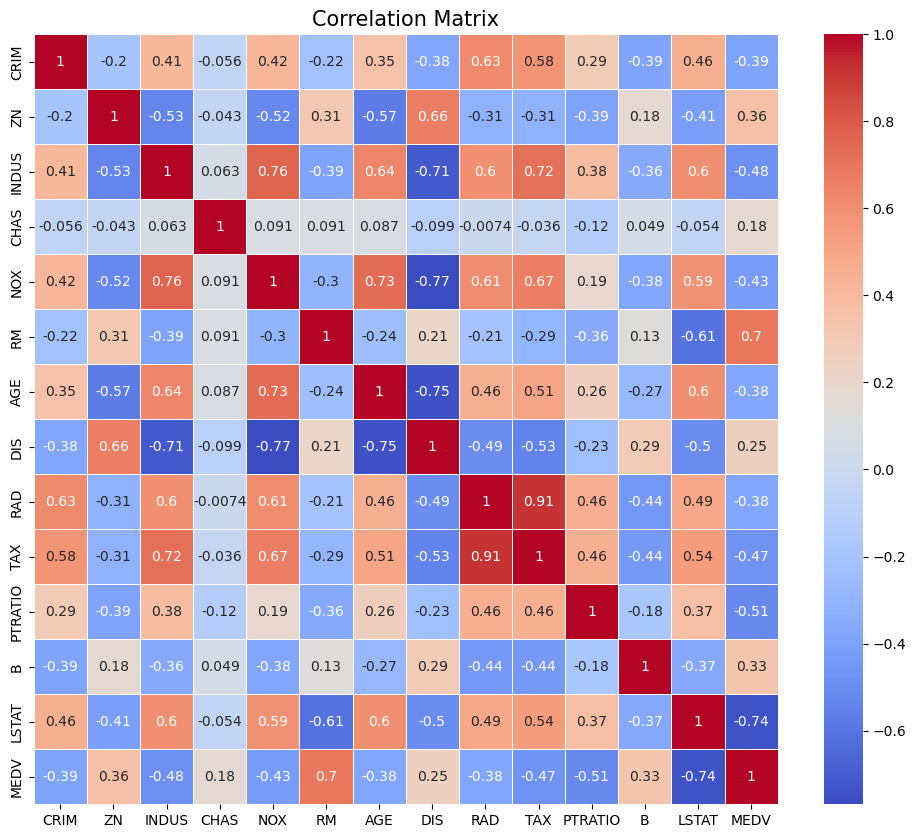

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(boston.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix", fontsize=15)
plt.show()

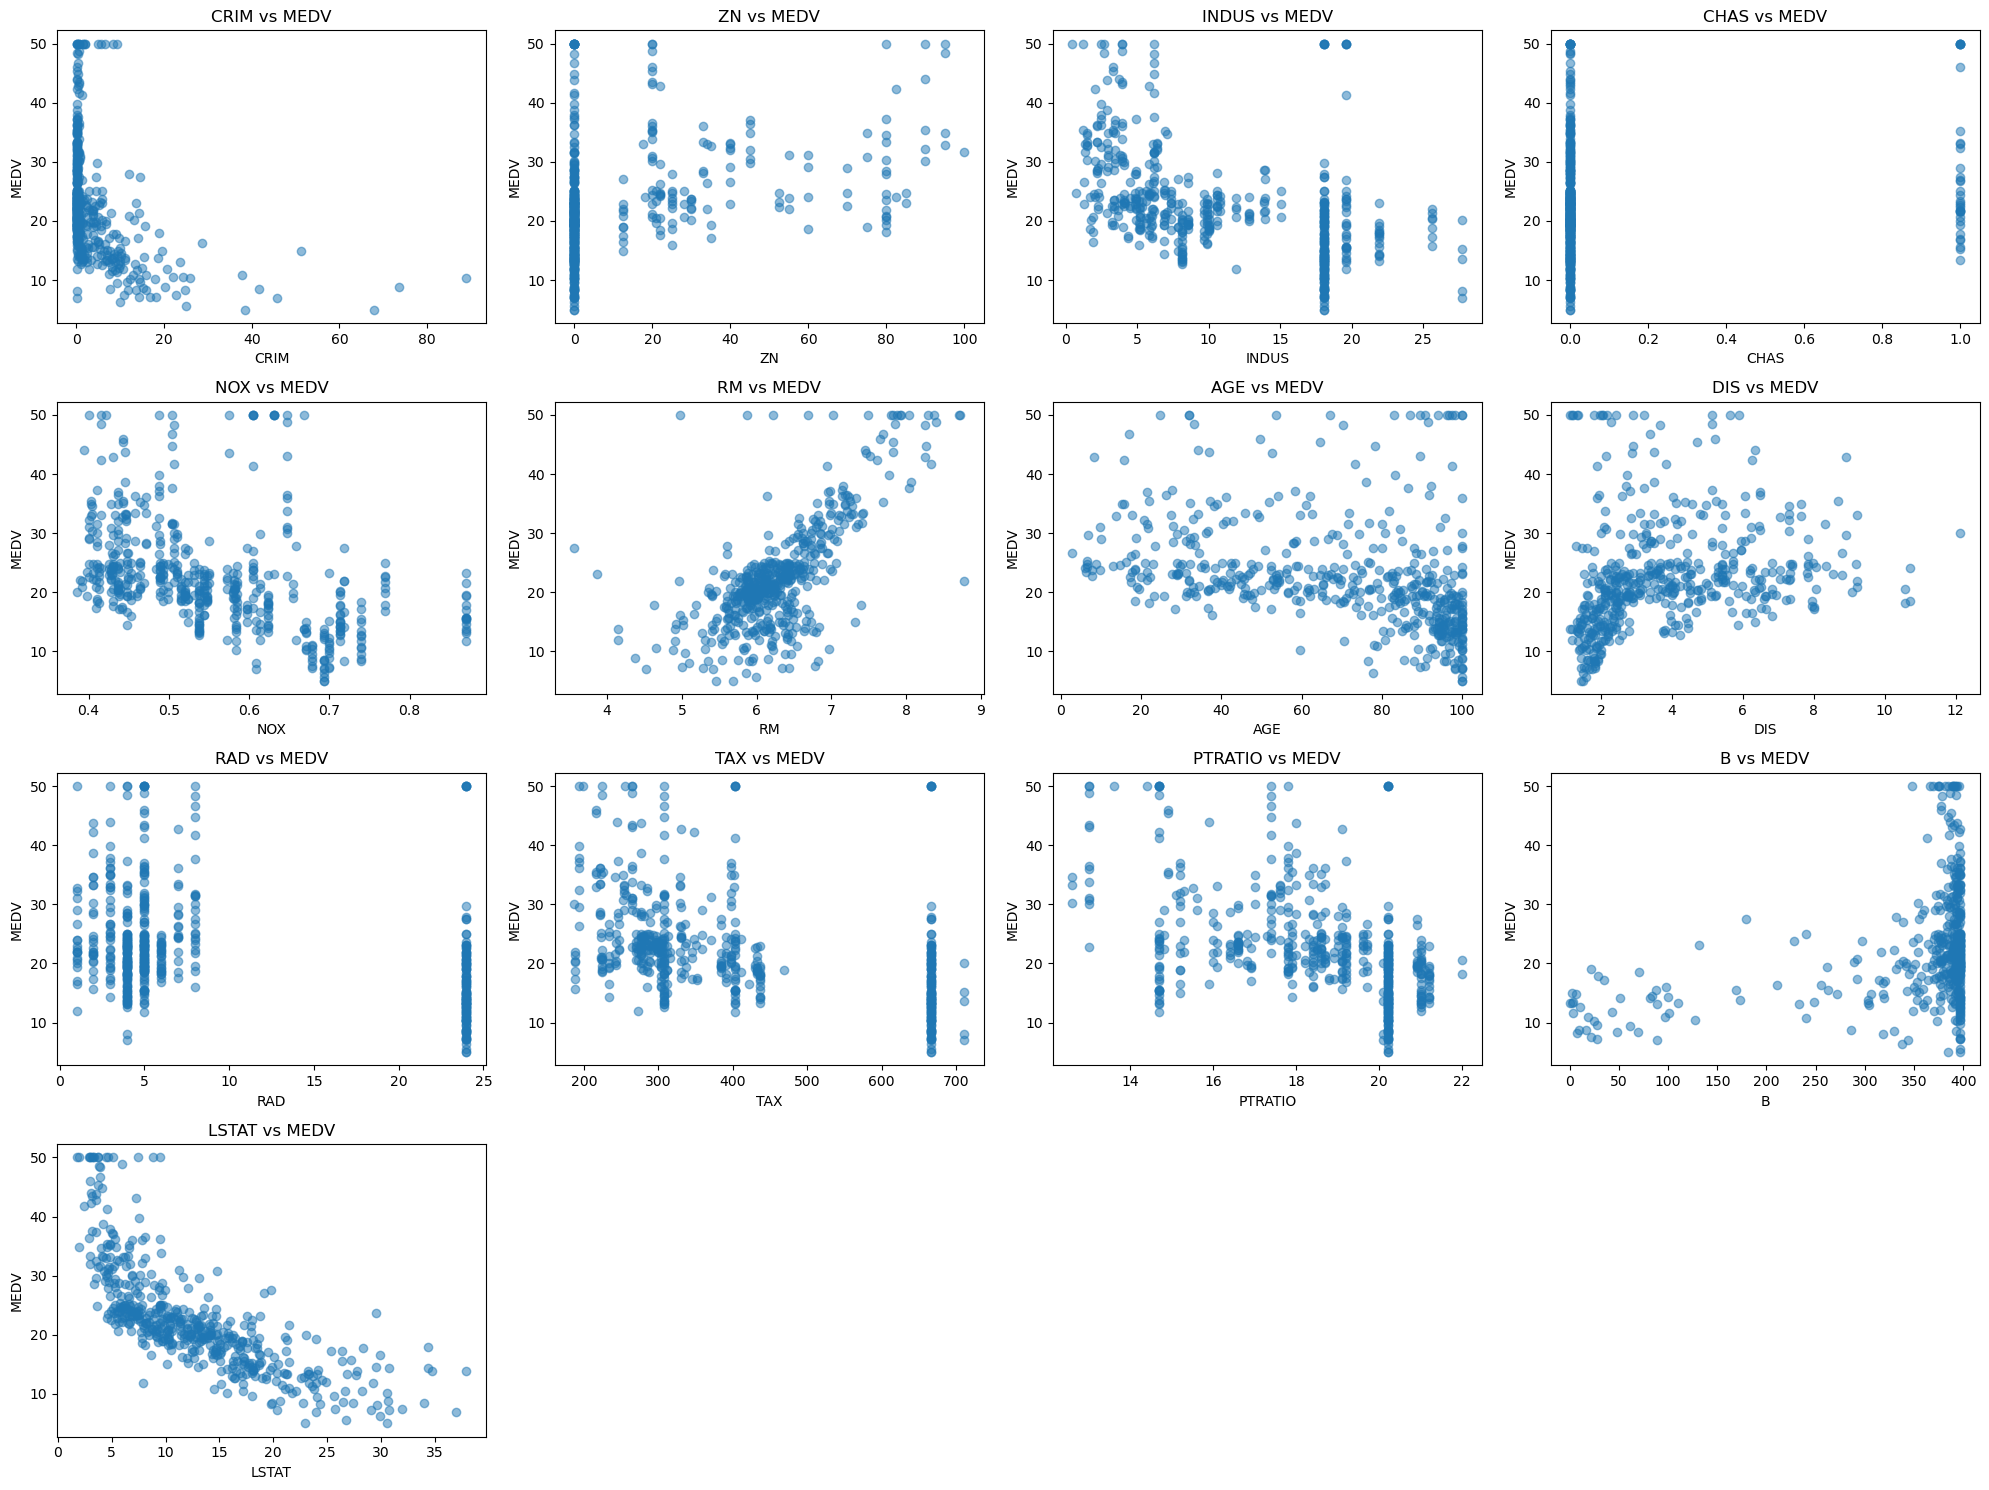

In [7]:
plt.figure(figsize=(20, 15))
features = boston.columns.tolist()[:-1]  
target = boston.columns[-1]
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    plt.scatter(boston[feature], boston[target], alpha=0.5)
    plt.title(f"{feature} vs {target}")
    plt.xlabel(feature)
    plt.ylabel(target)
plt.tight_layout()
plt.show()

# 4. Data preprocessing

In [8]:
# Split the data into features and target
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (404, 13)
Testing data shape: (102, 13)


# 5. Model training

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 6. Model evaluation

In [10]:
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


Mean Squared Error: 24.2911
Root Mean Squared Error: 4.9286
R2 Score: 0.6688


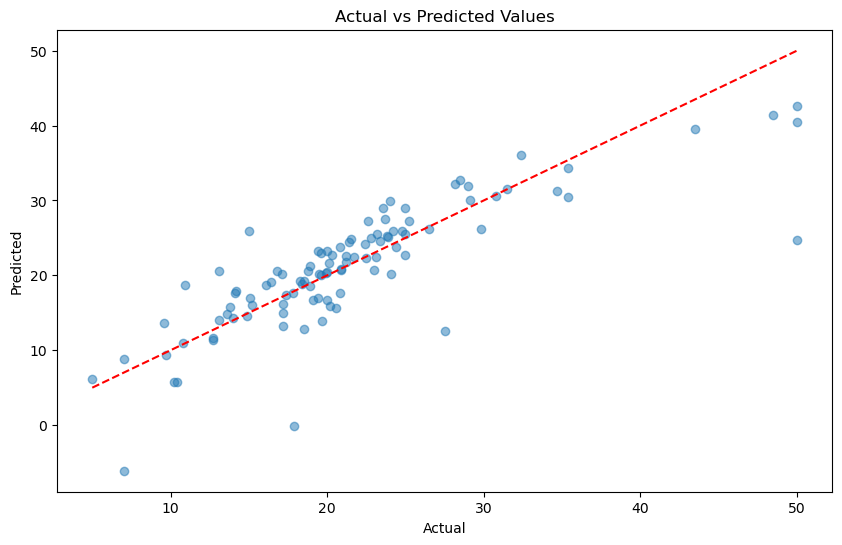

In [11]:
# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 7. Feature importance


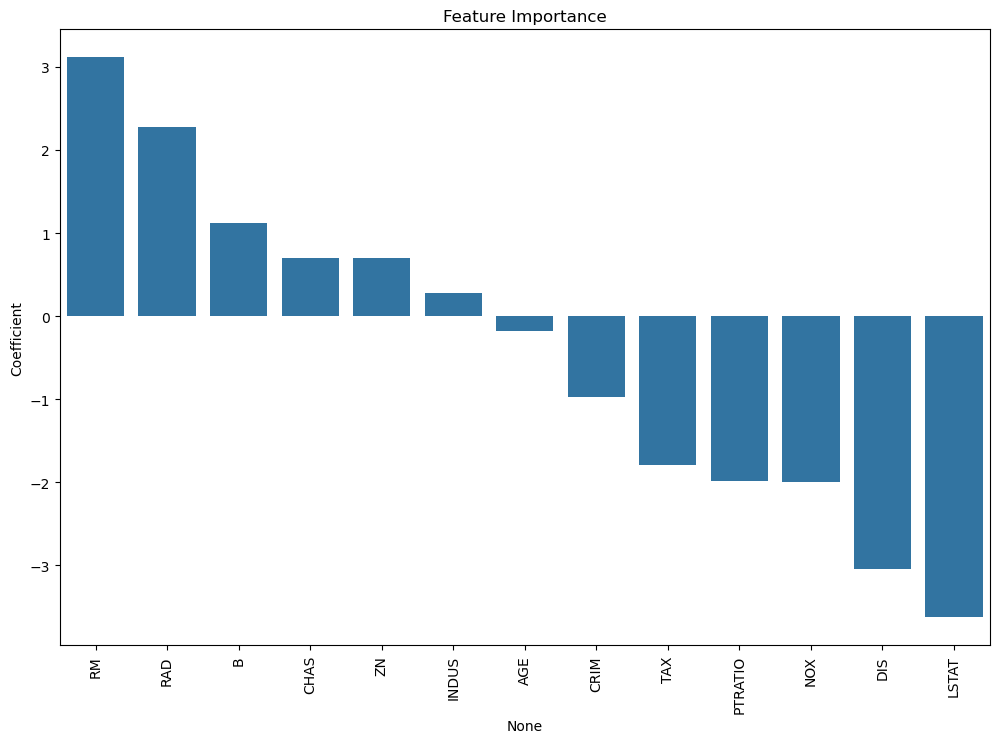

In [12]:
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=coefficients.index, y=coefficients['Coefficient'])
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()


# 8. Summary

## 8.1 Summary of Linear Regression Model for Boston Housing Dataset

### Model Performance
* **R² Score:** 0.6688 - The model explains 66.88% of the variance in housing prices
* **Root Mean Squared Error:** 4.9286 - On average, predictions are off by $4.93 thousand
* **Mean Squared Error:** 24.2911

### Feature Importance
* **Most influential positive features:** RM, RAD, B
* **Most influential negative features:** LSTAT, DIS, NOX

### Insights
* Room number (RM) has the strongest positive impact on house value
* Lower status population percentage (LSTAT) has the strongest negative impact
* Distance to employment centers (DIS) shows a negative relationship with price
* The correlation matrix reveals strong multicollinearity between several features

### Conclusions
1. This linear regression model provides a reasonably good baseline for predicting Boston housing prices
2. The R² of 0.67 indicates the model explains a moderate portion of price variance
3. Future improvements could include:
   - Exploring non-linear relationships between features and target
   - Feature engineering (interactions, polynomial features)
   - Testing more complex models like Random Forest or Gradient Boosting
   - Addressing potential outliers visible in the Actual vs Predicted plot
4. The feature importance analysis provides actionable insights for real estate investment